In [172]:
from itertools import product
import numpy as np
import fastplotlib as fpl
import pygfx
import imageio.v3 as iio
from PIL.JpegPresets import presets as qtables
from typing import *
from tqdm import tqdm

In [173]:
img = iio.imread("imageio:astronaut.png") @ np.asarray([0.299, 0.587, 0.114])

In [174]:
# quantization table for grayscale
# qtable_gray = np.asarray(qtables["web_high"]["quantization"][0]).reshape(8, 8)

# Standard Luminance Quantization Table (Annex K.1)
qtable_gray = np.array([
    [16, 11, 10, 16, 24,  40,  51,  61],
    [12, 12, 14, 19, 26,  58,  60,  55],
    [14, 13, 16, 24, 40,  57,  69,  56],
    [14, 17, 22, 29, 51,  87,  80,  62],
    [18, 22, 37, 56, 68, 109, 103,  77],
    [24, 35, 55, 64, 81, 104, 113,  92],
    [49, 64, 78, 87,103, 121, 120, 101],
    [72, 92, 95, 98,112, 100, 103,  99]
], dtype=np.uint8)

In [175]:
## NOTE: The above quantization table is not the same as the standard chrominance and luminance quantization tables from the JPEG standard. 
## Those are provided below. Since we are working with chrominance/luminance reps, might as well use the standard to get more compression? 
'''
# Standard Luminance Quantization Table (Annex K.1)
Q_LUMINANCE = np.array([
    [16, 11, 10, 16, 24,  40,  51,  61],
    [12, 12, 14, 19, 26,  58,  60,  55],
    [14, 13, 16, 24, 40,  57,  69,  56],
    [14, 17, 22, 29, 51,  87,  80,  62],
    [18, 22, 37, 56, 68, 109, 103,  77],
    [24, 35, 55, 64, 81, 104, 113,  92],
    [49, 64, 78, 87,103, 121, 120, 101],
    [72, 92, 95, 98,112, 100, 103,  99]
], dtype=np.uint8)

# Standard Chrominance Quantization Table (Annex K.1)
Q_CHROMINANCE = np.array([
    [17, 18, 24, 47, 99,  99,  99,  99],
    [18, 21, 26, 66, 99,  99,  99,  99],
    [24, 26, 56, 99, 99,  99,  99,  99],
    [47, 66, 99, 99, 99,  99,  99,  99],
    [99, 99, 99, 99, 99,  99,  99,  99],
    [99, 99, 99, 99, 99,  99,  99,  99],
    [99, 99, 99, 99, 99,  99,  99,  99],
    [99, 99, 99, 99, 99,  99,  99,  99]
], dtype=np.uint8)
'''

'\n# Standard Luminance Quantization Table (Annex K.1)\nQ_LUMINANCE = np.array([\n    [16, 11, 10, 16, 24,  40,  51,  61],\n    [12, 12, 14, 19, 26,  58,  60,  55],\n    [14, 13, 16, 24, 40,  57,  69,  56],\n    [14, 17, 22, 29, 51,  87,  80,  62],\n    [18, 22, 37, 56, 68, 109, 103,  77],\n    [24, 35, 55, 64, 81, 104, 113,  92],\n    [49, 64, 78, 87,103, 121, 120, 101],\n    [72, 92, 95, 98,112, 100, 103,  99]\n], dtype=np.uint8)\n\n# Standard Chrominance Quantization Table (Annex K.1)\nQ_CHROMINANCE = np.array([\n    [17, 18, 24, 47, 99,  99,  99,  99],\n    [18, 21, 26, 66, 99,  99,  99,  99],\n    [24, 26, 56, 99, 99,  99,  99,  99],\n    [47, 66, 99, 99, 99,  99,  99,  99],\n    [99, 99, 99, 99, 99,  99,  99,  99],\n    [99, 99, 99, 99, 99,  99,  99,  99],\n    [99, 99, 99, 99, 99,  99,  99,  99],\n    [99, 99, 99, 99, 99,  99,  99,  99]\n], dtype=np.uint8)\n'

In [181]:
block_size = 8

I, J = np.meshgrid(np.arange(block_size), np.arange(block_size), indexing="ij")

# def generate_basis():
zigzag = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [2, 0],
        [1, 1],
        [0, 2],
        [0, 3],
        [1, 2],
        [2, 1],
        [3, 0],
        [4, 0],
        [3, 1],
        [2, 2],
        [1, 3],
        [0, 4],
        [0, 5],
        [1, 4],
        [2, 3],
        [3, 2],
        [4, 1],
        [5, 0],
        [6, 0],
        [5, 1],
        [4, 2],
        [3, 3],
        [2, 4],
        [1, 5],
        [0, 6],
        [0, 7],
        [1, 6],
        [2, 5],
        [3, 4],
        [4, 3],
        [5, 2],
        [6, 1],
        [7, 0],
        [7, 1],
        [6, 2],
        [5, 3],
        [4, 4],
        [3, 5],
        [2, 6],
        [1, 7],
        [2, 7],
        [3, 6],
        [4, 5],
        [5, 4],
        [6, 3],
        [7, 2],
        [7, 3],
        [6, 4],
        [5, 5],
        [4, 6],
        [3, 7],
        [4, 7],
        [5, 6],
        [6, 5],
        [7, 4],
        [7, 5],
        [6, 6],
        [5, 7],
        [6, 7],
        [7, 6],
        [7, 7],
    ]
)

basis = np.zeros((block_size**2, block_size, block_size))
qtable_zigzag = np.zeros(block_size**2)

# u, v is the [i, j] index of the 8x8 block
for i, (u, v) in enumerate(zigzag):
    c = (
        (2 / block_size)
        * np.cos((2 * I + 1) * u * np.pi / (2 * block_size))
        * np.cos((2 * J + 1) * v * np.pi / (2 * block_size))
    )
    c /= np.linalg.norm(c)

    basis[i] = c
    qtable_zigzag[i] = qtable_gray[u, v]

In [14]:
iw_basis = fpl.ImageWidget(
    [b for b in basis], 
    histogram_widget=False, 
    cmap="viridis",
    figure_kwargs={"size": (900, 900)},
)
for subplot in iw_basis.figure:
    subplot.toolbar = False
    subplot.axes.visible = False
    
iw_basis.show()

In [15]:
basis.shape

(64, 8, 8)

In [16]:
(64 * 8 * 8) / 4

1024.0

## Projects to DCT space and then unprojects

In [177]:
# # indices of all 8x8 image blocks
# block_indices = list(product(*(range(np.ceil(dim / block_size).astype(int)) for dim in img.shape)))

# # go through each image block
# for b_i, b_j in tqdm(block_indices):
#     # pixel start and stop indices in this block
#     row_start = b_i * block_size
#     row_stop = row_start + block_size
    
#     col_start = b_j * block_size
#     col_stop = col_start + block_size
#     r_slice, c_slice = slice(row_start, row_stop), slice(col_start, col_stop)

#     # slice 8x8 block from image
#     block = img[r_slice, c_slice]

#     n = 64  # number of basis elements to keep

#     # projection onto the DCT space
#     projection = np.zeros((block_size, block_size))

#     # project the block onto each basis
#     for i in range(n):
#         projection += basis[i] * (basis[i] * block).sum()

#     # image with truncated basis
#     iw.managed_graphics[1].data[r_slice, c_slice] = projection
    
# iw.managed_graphics[1].vmin = 0
# iw.managed_graphics[1].max = 255

## This just projects to DCT space

In [180]:
# indices of all 8x8 image blocks
block_indices = list(product(*(range(np.ceil(dim / block_size).astype(int)) for dim in img.shape)))

img_dct_quantized = np.zeros(img.shape, dtype=np.uint8)

# go through each image block
for b_i, b_j in tqdm(block_indices):
    # pixel start and stop indices in this block
    row_start = b_i * block_size
    row_stop = row_start + block_size
    
    col_start = b_j * block_size
    col_stop = col_start + block_size
    r_slice, c_slice = slice(row_start, row_stop), slice(col_start, col_stop)

    # slice 8x8 block from image
    block = img[r_slice, c_slice]

    n = 64  # number of basis elements to keep

    # projection onto the DCT space
    projection = np.zeros((block_size, block_size), dtype=np.uint8)

    # project the block onto each basis
    for i in range(n):
        p_i, p_j = zigzag[i]
        projection[p_i, p_j] = ((basis[i] * block).sum() / qtable_zigzag[i]).astype(np.uint8)

    # image with truncated basis
    img_dct_quantized[r_slice, c_slice] = projection

100%|█████████████████████████████████████| 4096/4096 [00:02<00:00, 1744.78it/s]


In [182]:
zigzag.shape

(64, 2)

# Generate a RLE for each block, excluding the DC term

In [224]:
def _rle_single_block(block: np.ndarray,
                      iter_scheme: np.ndarray):

    is_zeros = False
    counter = 0
    encoding_list = []
    to_add = False
    for i, (ind0, ind1) in enumerate(iter_scheme):
        if i == 0:
            continue
        curr_value = block[ind0, ind1]
        if curr_value == 0:
            if is_zeros:
                counter += 1
            else:
                is_zeros = True
                counter = 1
                to_add = True
        else:
            if is_zeros:
                is_zeros = False
                encoding_list.append((counter, curr_value))
                to_add = False
                counter = 0
            else:
                encoding_list.append((0, curr_value))
                to_add = False
                is_zeros = False
                counter = 0
    encoding_list.append((0, 0)) #End of block encoding
    return encoding_list


def _decode_single_block_rle(encoding: list,
                             iter_scheme: np.ndarray,
                             block_shape: tuple[int, int],
                            dtype=np.uint8) -> List[Tuple]:
    
    updated_values = np.zeros((block_shape[0], block_shape[1]), dtype=dtype)
    block_counter = 0
    run, size = encoding[block_counter]
    if run == 0 and size == 0:
        at_eof = True
    else:
        at_eof = False
        num_remaining = run + 1
        
    for i, (ind0, ind1) in enumerate(iter_scheme):
        if i == 0: 
            continue
        if not at_eof:
            if num_remaining > 1:
                updated_values[ind0, ind1] = 0
                num_remaining -= 1
            elif num_remaining == 1:
                updated_values[ind0, ind1] = size
                block_counter += 1
                run, size = encoding[block_counter]
                if run == 0 and size == 0:
                    at_eof = True
                else:
                    at_eof = False
                    num_remaining = run + 1
                
        else:
            updated_values[ind0, ind1] = 0
        
    return updated_values



# slice 8x8 block from image
test_block = img_dct_quantized[0:8, 0:8]
rle_encoding = _rle_single_block(test_block, zigzag)
decoded_rle = _decode_single_block_rle(rle_encoding, 
                                       zigzag,
                                       (8, 8))

decoded_test = decoded_rle.copy()
input_test = test_block.copy() 
input_test[0, 0] = 0
print(np.allclose(input_test, decoded_test))

True


# Define a generic tree class so we can decode things quickly

In [153]:
class HuffmanNode:
    def __init__(self):
        self.left = None
        self.right = None
        self.value = None  # Only set for leaf nodes

class HuffmanTree:
    def __init__(self, code_dict):
        """
        code_dict: dict where key = symbol (e.g., int), value = binary string (e.g., "01011")
        """
        self.root = HuffmanNode()
        for symbol, bitstring in code_dict.items():
            self._insert(bitstring, symbol)

        self.tracked_node = self.root

    def _insert(self, bitstring, symbol):
        node = self.root
        for bit in bitstring:
            if bit == '0':
                if node.left is None:
                    node.left = HuffmanNode()
                node = node.left
            elif bit == '1':
                if node.right is None:
                    node.right = HuffmanNode()
                node = node.right
            else:
                raise ValueError(f"Invalid bit '{bit}' in code string.")
        if node.value is not None:
            raise ValueError(f"Conflict inserting symbol {symbol}: path '{bitstring}' already has a value.")
        node.value = symbol

    def visit(self, direction: str):
        if direction == '0':
            if self.tracked_node.left is not None:
                self.tracked_node = self.tracked_node.left
        elif direction == '1':
            if self.tracked_node.right is not None:
                self.tracked_node =  self.tracked_node.right
        else:
            raise ValueError("Invalid instruction")
        if self.tracked_node.value is not None:
            return self.tracked_node.value
        else:
            return None

    def reset_tracker(self):
        self.tracked_node = self.root
            
            
    def decode(self, bitstream):
        """
        Generator that yields decoded symbols from a string of bits.
        """
        node = self.root
        for bit in bitstream:
            node = node.left if bit == '0' else node.right
            if node is None:
                raise ValueError("Invalid bitstream: path does not exist.")
            if node.value is not None:
                yield node.value
                node = self.root  # restart from the root for next code

# JPEG Standard Luminance DC Huffman Table
# Category: 0–11 → Binary Huffman Codeword as String
DC_CATEGORY_TO_HUFFMAN = {
     0: "00",
     1: "010",
     2: "011",
     3: "100",
     4: "101",
     5: "110",
     6: "1110",
     7: "11110",
     8: "111110",
     9: "1111110",
    10: "11111110",
    11: "111111110"
}

DC_decoder = HuffmanTree(DC_CATEGORY_TO_HUFFMAN)

# Strategy to track and code the DC components via differential pulse code modulation 

In [154]:
import numpy as np

DC_CATEGORY_TO_HUFFMAN = {
     0: "00",
     1: "010",
     2: "011",
     3: "100",
     4: "101",
     5: "110",
     6: "1110",
     7: "11110",
     8: "111110",
     9: "1111110",
    10: "11111110",
    11: "111111110"
}

def extract_dc_comps(img_dct_quantized):
    elt_list = []
    for k in range(0, img_dct_quantized.shape[0], 8):
        for j in range(0, img_dct_quantized.shape[1], 8):
            elt_list.append(img_dct_quantized[k, j])
    return np.array(elt_list)

def dc_difference_categories(dc_coeffs):
    dc_coeffs = np.asarray(dc_coeffs)
    diffs = np.empty_like(dc_coeffs)
    diffs[0] = dc_coeffs[0]
    diffs[1:] = dc_coeffs[1:] - dc_coeffs[:-1]

    # Compute categories
    abs_diffs = np.abs(diffs)
    categories = np.zeros_like(abs_diffs)
    nonzero = abs_diffs != 0
    categories[nonzero] = np.floor(np.log2(abs_diffs[nonzero])).astype(int) + 1

    return categories, diffs

def get_magnitude_bits(diff, category):
    if category == 0:
        return ""
    if diff >= 0:
        return format(diff, f'0{category}b')
    else:
        val = (1 << category) + diff - 1
        return format(val, f'0{category}b')

def encode_dc_bitstream(dc_coeffs):
    categories, diffs = dc_difference_categories(dc_coeffs)
    bitstream = ""
    for i in range(len(dc_coeffs)):
        cat = categories[i]
        diff = diffs[i]
        huffman_prefix = DC_CATEGORY_TO_HUFFMAN[cat]
        magnitude_bits = get_magnitude_bits(diff, cat)
        bitstream += huffman_prefix + magnitude_bits
    return bitstream

dc_elts = extract_dc_comps(img_dct_quantized)
bitstring = encode_dc_bitstream(dc_elts.astype(int))

print(f"efficiency of DC Comp encoding is {len(bitstring) / (8 * len(dc_elts))}")

efficiency of DC Comp encoding is 0.741790771484375


# Let's decode this now

In [170]:
def decode_dc_difference(category: int, magnitude_bits: str) -> int:
    """
    Decodes a JPEG DC coefficient difference from its category and magnitude bits.
    
    Args:
        category (int): The Huffman category (0 to 11).
        magnitude_bits (str): The magnitude bits string (length == category).
    
    Returns:
        int: The decoded signed difference value.
    """
    if category == 0:
        return 0
    if len(magnitude_bits) != category:
        raise ValueError(f"Magnitude bits length {len(magnitude_bits)} doesn't match category {category}")

    if magnitude_bits[0] == '1':
        return int(magnitude_bits, 2)
    else:
        return int(magnitude_bits, 2) - (2 ** category - 1)
        
def decode_DC_comps(bitstring, DC_decoder):
    is_category = True
    is_inverted = False
    category = None
    counter = 0
    countdown = 0

    results = []
    current_accumulator = ""

    for i in bitstring:
        if is_category:
            output = DC_decoder.visit(i)
            
            
            if output is None:
                continue
            else:
                category = output
                if category == 0:
                    # There was no change; easy to track this
                    results.append(results[-1])
                    DC_decoder.reset_tracker()
                    is_category = True
                else:
                    countdown = category
                    is_category = False
        else: #We are looking at the k bits AFTER category
            current_accumulator += i
            countdown -= 1
            if countdown <= 0: #Save out results
                is_category = True
                is_inverted = None
                decoded_value = decode_dc_difference(category, current_accumulator)
                category = None
                DC_decoder.reset_tracker()
                current_accumulator = ""
                if len(results) == 0:
                    results.append(decoded_value)
                else: #Add the difference
                    results.append(results[-1] + decoded_value)
    return np.array(results)

results = decode_DC_comps(bitstring, DC_decoder)

In [171]:
# Verify that the DC coefficients can be decoded properly
results = results.astype(np.uint8)
print(np.allclose(results, dc_elts))

True


RFBOutputContext()

Max vertex attribute stride unknown. Assuming it is 2048
/data/home/app2139/fastplotlib/fastplotlib/graphics/features/_base.py:18: UserWarning: casting float64 array to float32
  warn(f"casting {array.dtype} array to float32")


JupyterRenderCanvas(css_height='500.0px', css_width='1000.0px')
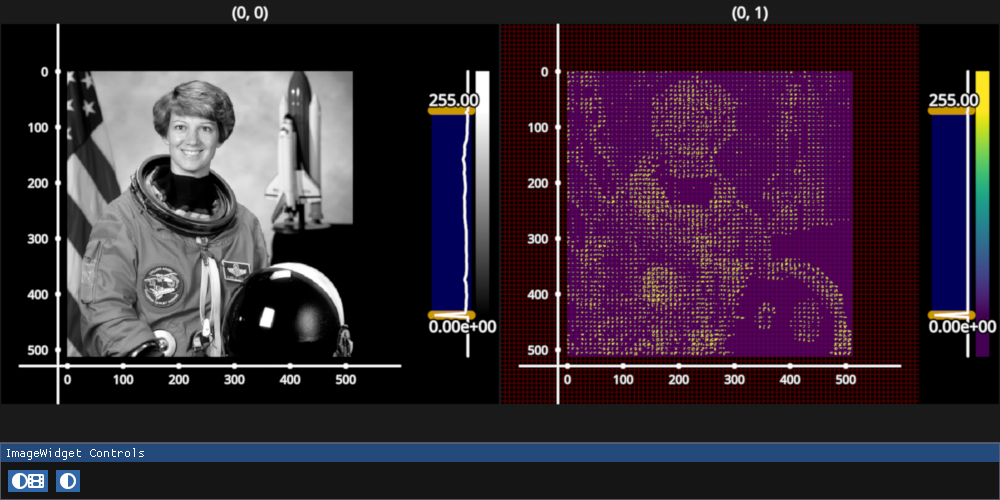

In [31]:
iw = fpl.ImageWidget(
    [img, img_dct_quantized],
    figure_kwargs={"size": (1000, 500)},
    cmap="gray"
)
iw.managed_graphics[1].vmin = 0
iw.managed_graphics[1].max = 255

grid = pygfx.Grid(
    None, 
    material=pygfx.GridMaterial(
        major_step=(8, 8), major_color="r", major_thickness=0.1, thickness_space='world'
    ), 
    orientation="xy"
)
grid.world.z = 2
grid.world.x = -0.5
grid.world.y = -0.5
iw.figure[0, 1].scene.add(grid)
iw.reset_vmin_vmax_frame()
iw.cmap = ["gray", "viridis"]
for g in iw.managed_graphics:
    g.offset = (0.5, 0.5, 0)

iw.show()